# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

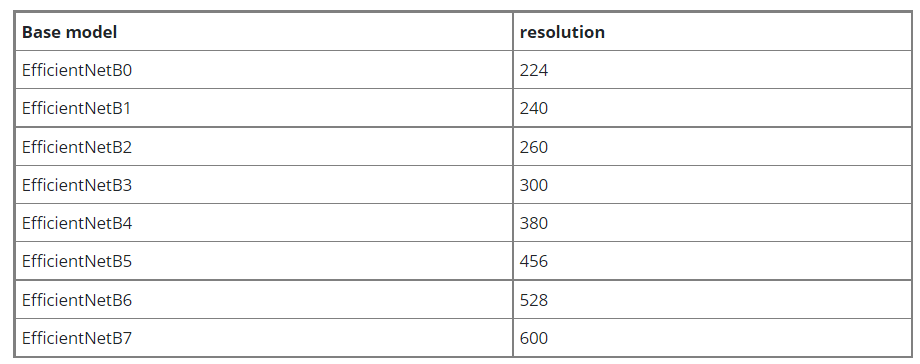

# Data Pre Processing

In [3]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('../../dataset/train')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['crease', 'damage', 'dot', 'scratch']
Types of classes labels found:  4


In [4]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('../../dataset/train' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('../../dataset/train' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [5]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                              image
0  crease            ../../dataset/train/crease/19_flip1.jpg
1  crease             ../../dataset/train/crease/19_rot1.jpg
2  crease                  ../../dataset/train/crease/20.jpg
3  crease  ../../dataset/train/crease/2023-04-06 19-31-26...
4  crease  ../../dataset/train/crease/2023-04-06 19-31-45...
      Labels                                    image
242  scratch   ../../dataset/train/scratch/6_rot3.jpg
243  scratch        ../../dataset/train/scratch/7.jpg
244  scratch   ../../dataset/train/scratch/7_flip.jpg
245  scratch  ../../dataset/train/scratch/7_flip1.jpg
246  scratch   ../../dataset/train/scratch/7_rot2.jpg


In [6]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  247
Labels
scratch    133
damage      87
crease      17
dot         10
Name: count, dtype: int64


In [7]:
import cv2
path = '../../dataset/train/'
dataset_path = os.listdir('../../dataset/train')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(247, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['crease' 'crease' 'crease' 'crease' 'crease' 'crease' 'crease' 'crease'
 'crease' 'crease' 'crease' 'crease' 'crease' 'crease' 'crease' 'crease'
 'crease' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage' 'damage'
 'dot' 'dot' 'dot' 'dot' 'dot' 'dot' 'dot' 'dot' 'd

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Etiketlerinizi yeniden şekillendirin
y = y.reshape(-1, 1)

# ColumnTransformer kullanarak one-hot encoding yapın
ct = ColumnTransformer([('my_ohe', OneHotEncoder(sparse=False), [0])], remainder='passthrough')

# Etiketlerinizi one-hot formatına dönüştürün
Y = ct.fit_transform(y)

# Sonuçları kontrol edin
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(234, 224, 224, 3)
(234, 4)
(13, 224, 224, 3)
(13, 4)



# EfficientNet Implementation :



In [13]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 4
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [14]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=35, verbose=2)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4)              │     4,054,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/35
8/8 - 94s - 12s/step - accuracy: 0.4145 - loss: 5.0901
Epoch 2/35
8/8 - 21s - 3s/step - accuracy: 0.5128 - loss: 2.3463
Epoch 3/35
8/8 - 19s - 2s/step - accuracy: 0.4487 - loss: 4.0817
Epoch 4/35
8/8 - 19s - 2s/step - accuracy: 0.4829 - loss: 1.4310
Epoch 5/35
8/8 - 19s - 2s/step - accuracy: 0.5385 - loss: 1.6077
Epoch 6/35
8/8 - 20s - 2s/step - accuracy: 0.5983 - loss: 1.3393
Epoch 7/35
8/8 - 20s - 3s/step - accuracy: 0.5812 - loss: 1.5329
Epoch 8/35
8/8 - 20s - 2s/step - accuracy: 0.6410 - loss: 1.7825
Epoch 9/35
8/8 - 20s - 2s/step - accuracy: 0.6966 - loss: 1.4203
Epoch 10/35
8/8 - 19s - 2s/step - accuracy: 0.7265 - loss: 1.1490
Epoch 11/35
8/8 - 19s - 2s/step - accuracy: 0.7521 - loss: 1.1531
Epoch 12/35
8/8 - 19s - 2s/step - accuracy: 0.7692 - loss: 1.0681
Epoch 13/35
8/8 - 20s - 2s/step - accuracy: 0.7393 - loss: 1.2697
Epoch 14/35
8/8 - 19s - 2s/step - accuracy: 0.8248 - loss: 0.6417
Epoch 15/35
8/8 - 20s - 2s/step - accuracy: 0.8462 - loss: 0.9303
Epoch 16/35
8/8 - 

In [41]:
class_names = ['crease', 'damage', 'dot', 'scratch'] # Sınıf adlarını burada tanımlayın

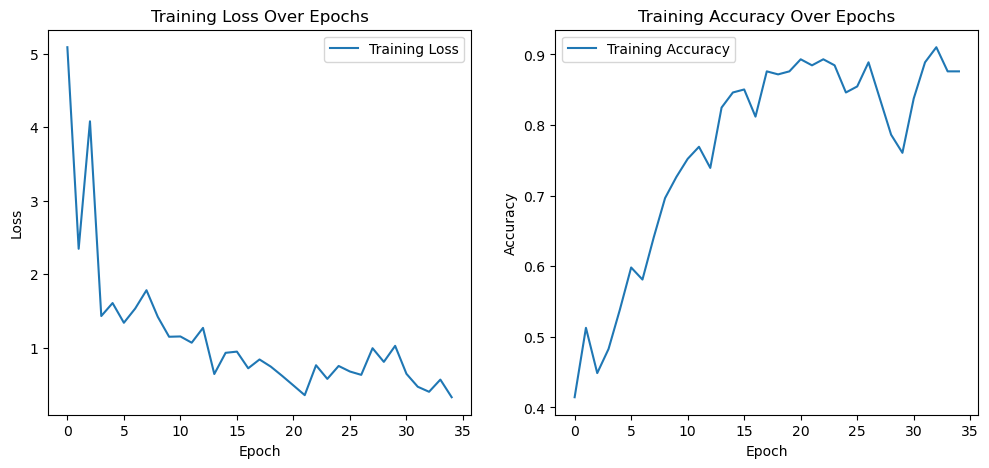

In [16]:
import matplotlib.pyplot as plt

# Eğitim kayıpları ve doğrulukları için grafikler
plt.figure(figsize=(12, 5))

# Kayıp Grafiği
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Doğruluk Grafiği
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.show()

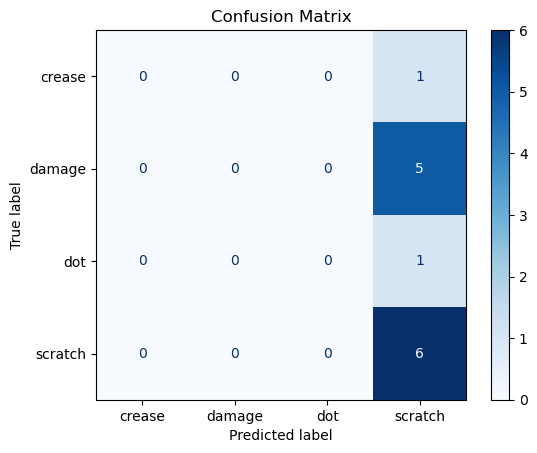

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# test_y çok sınıflı etiketlerdir (örneğin, [0, 1, 2] gibi sınıf id'leri)
y_true = np.argmax(test_y, axis=1)  # Eğer test_y one-hot encoded ise, bunu kullanın.

# y_pred sınıf olasılıklarını içeriyorsa, bunu sınıf tahminlerine çevirin
y_pred_classes = np.argmax(y_pred, axis=1)

# Karmaşıklık matrisi oluşturma
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

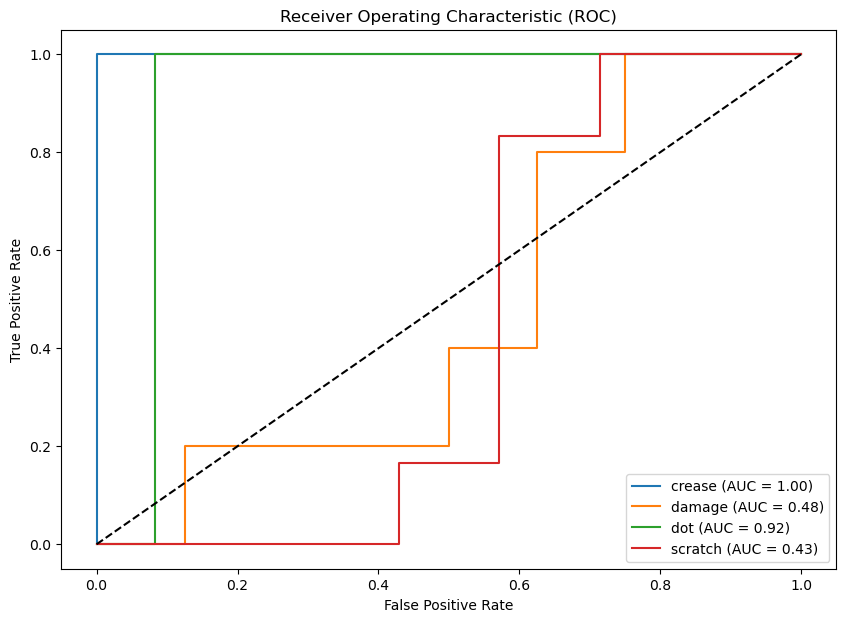

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Hedef etiketlerin binarize edilmesi (örneğin, one-hot encoding)
y_true_binarized = label_binarize(test_y, classes=[0, 1, 2, 3])  # Sınıf sayısı kadar

# ROC eğrisi ve AUC hesaplama
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_pred.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(y_pred.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


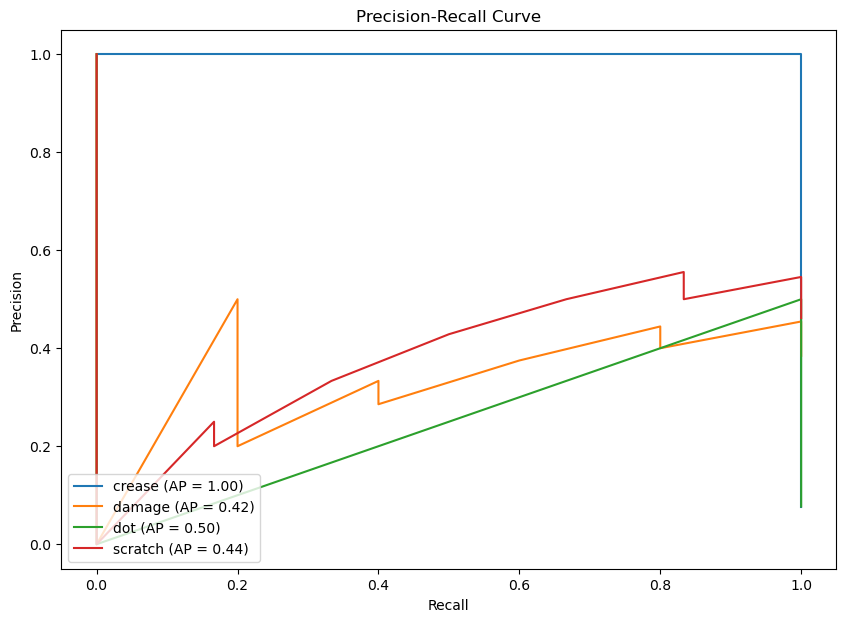

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Hedef etiketlerin binarize edilmesi (örneğin, one-hot encoding)
y_true_binarized = label_binarize(test_y, classes=[0, 1, 2, 3])  # Sınıf sayısı kadar

# Precision, Recall ve Average Precision (AP) hesaplama
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(y_pred.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_true_binarized[:, i], y_pred[:, i])
    pr_auc[i] = average_precision_score(y_true_binarized[:, i], y_pred[:, i])

plt.figure(figsize=(10, 7))
for i in range(y_pred.shape[1]):
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (AP = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


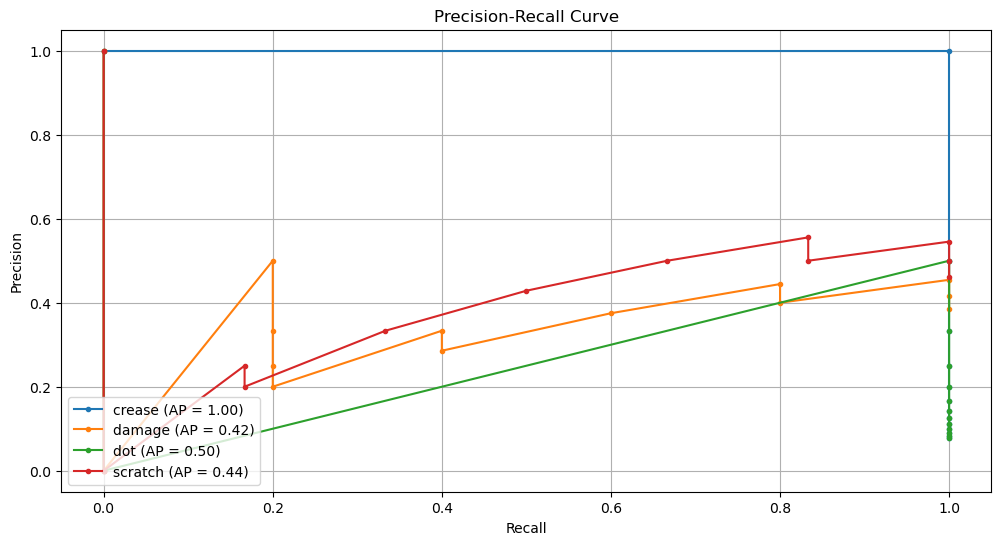

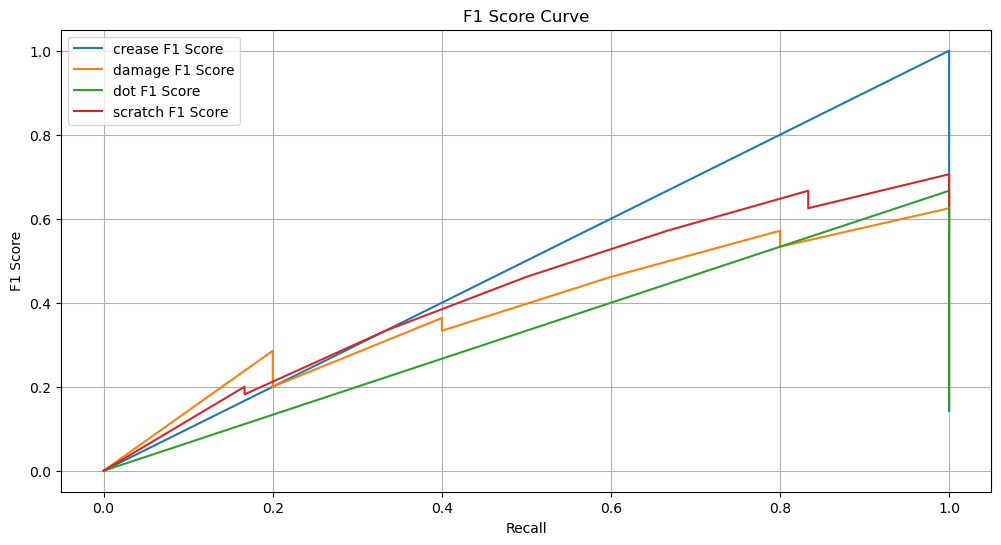

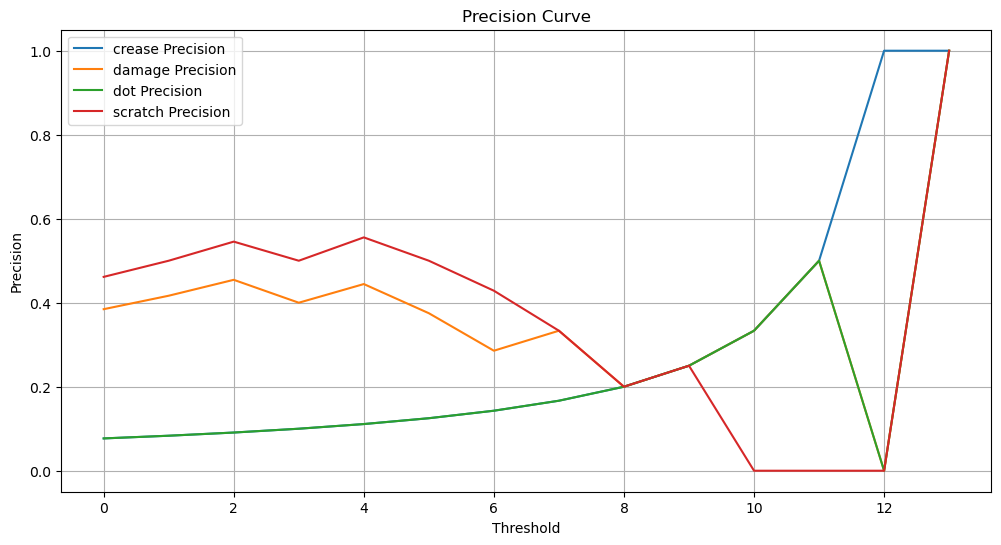

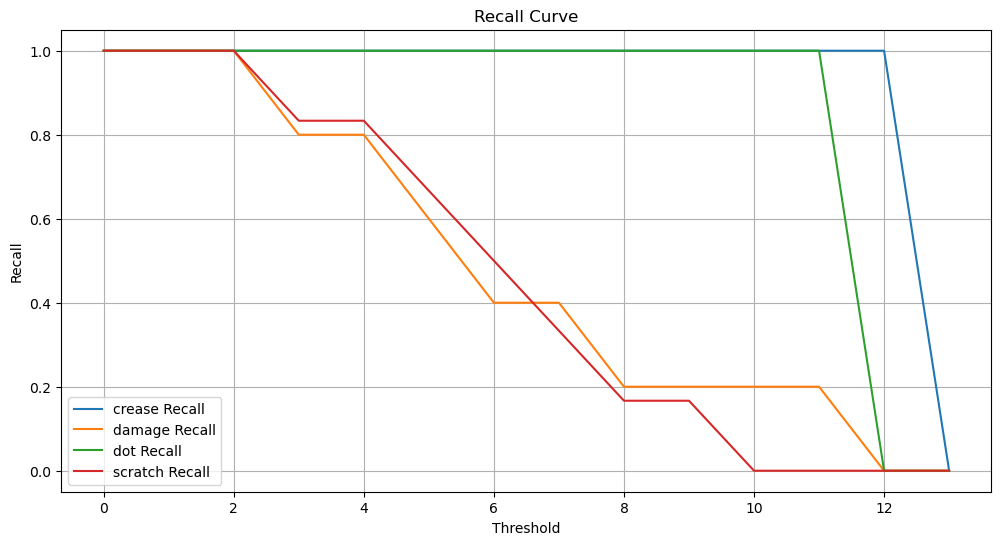

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score
from sklearn.preprocessing import label_binarize

# Gerçek etiketleri binarize et
y_true_binarized = label_binarize(test_y, classes=range(len(class_names)))  # Sınıf sayısına göre ayarlayın

# Modelden tahmin olasılıklarını alın
y_probs = model.predict(test_x)  # Bu, her sınıf için olasılıkları döndürür

# Precision-recall eğrisi ve Average Precision (AP) hesaplama
precision = dict()
recall = dict()
f1_scores = dict()
pr_auc = dict()

for i in range(y_probs.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_true_binarized[:, i], y_probs[:, i])
    pr_auc[i] = average_precision_score(y_true_binarized[:, i], y_probs[:, i])
    f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i] + 1e-8)  # F1 skorunu hesapla

# Precision-Recall eğrisi (pr_curve)
plt.figure(figsize=(12, 6))
for i in range(y_probs.shape[1]):
    plt.plot(recall[i], precision[i], marker='.', label=f'{class_names[i]} (AP = {pr_auc[i]:.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# F1 Skoru Eğrisi
plt.figure(figsize=(12, 6))
for i in range(y_probs.shape[1]):
    plt.plot(recall[i], f1_scores[i], label=f'{class_names[i]} F1 Score')

plt.title('F1 Score Curve')
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Precision Eğrisi
plt.figure(figsize=(12, 6))
for i in range(y_probs.shape[1]):
    plt.plot(precision[i], label=f'{class_names[i]} Precision')

plt.title('Precision Curve')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Recall Eğrisi
plt.figure(figsize=(12, 6))
for i in range(y_probs.shape[1]):
    plt.plot(recall[i], label=f'{class_names[i]} Recall')

plt.title('Recall Curve')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [30]:
import numpy as np

def top_n_accuracy(predictions, labels, n):
    top_n_correct = 0
    total = len(labels)
    
    for i in range(total):
        top_n_preds = np.argsort(predictions[i])[-n:]
        if labels[i] in top_n_preds:
            top_n_correct += 1
    
    return top_n_correct / total

all_preds = model.predict(test_x)  # Test verileri üzerinde tahmin yapın
all_labels = np.argmax(test_y, axis=1)  # Gerçek etiketler

# Tahminlerinizi ve gerçek etiketlerinizi kullanarak top-1 ve top-5 doğruluğu hesaplayın
top_1_accuracy = top_n_accuracy(all_preds, all_labels, 1)
top_5_accuracy = top_n_accuracy(all_preds, all_labels, 5)

print(f"Top-1 Accuracy: {top_1_accuracy:.2f}")
print(f"Top-5 Accuracy: {top_5_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Top-1 Accuracy: 0.46
Top-5 Accuracy: 1.00


In [38]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.4615 - loss: 6.1884
Loss = 6.188412189483643
Test Accuracy = 0.4615384638309479


In [39]:
model.save('efficientnet.h5')

# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


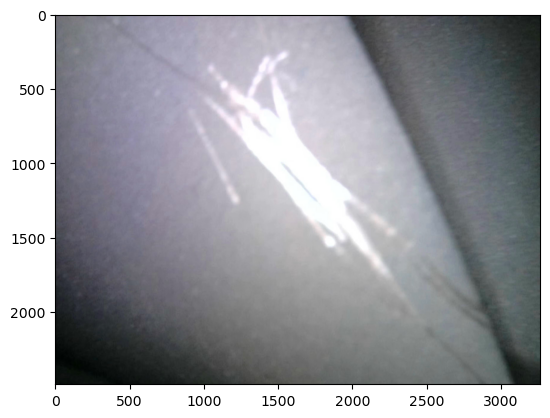

In [41]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '../../Aero-engine_defect-detect_new/images/train/1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [42]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[9.9754804e-01, 2.4106349e-03, 1.5771568e-05, 2.5469937e-05]],
      dtype=float32)

In [49]:
# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [41]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
8/8 - 20s - 2s/step - accuracy: 0.8974 - loss: 0.3682
Epoch 2/30
8/8 - 21s - 3s/step - accuracy: 0.9145 - loss: 0.4060
Epoch 3/30
8/8 - 19s - 2s/step - accuracy: 0.8761 - loss: 0.4572
Epoch 4/30
8/8 - 19s - 2s/step - accuracy: 0.8846 - loss: 0.4529
Epoch 5/30
8/8 - 19s - 2s/step - accuracy: 0.8632 - loss: 0.4214
Epoch 6/30
8/8 - 19s - 2s/step - accuracy: 0.8504 - loss: 0.5228
Epoch 7/30
8/8 - 19s - 2s/step - accuracy: 0.8675 - loss: 0.5510
Epoch 8/30
8/8 - 19s - 2s/step - accuracy: 0.8889 - loss: 0.3589
Epoch 9/30
8/8 - 19s - 2s/step - accuracy: 0.9103 - loss: 0.3159
Epoch 10/30
8/8 - 20s - 3s/step - accuracy: 0.8974 - loss: 0.2856
Epoch 11/30
8/8 - 21s - 3s/step - accuracy: 0.8846 - loss: 0.2950
Epoch 12/30
8/8 - 21s - 3s/step - accuracy: 0.9274 - loss: 0.2911
Epoch 13/30
8/8 - 19s - 2s/step - accuracy: 0.8974 - loss: 0.3109
Epoch 14/30
8/8 - 20s - 2s/step - accuracy: 0.9487 - loss: 0.2009
Epoch 15/30
8/8 - 19s - 2s/step - accuracy: 0.9188 - loss: 0.2300
Epoch 16/30
8/8 - 1

In [42]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
8/8 - 20s - 3s/step - accuracy: 0.9487 - loss: 0.1605
Epoch 2/30
8/8 - 20s - 3s/step - accuracy: 0.9530 - loss: 0.1258
Epoch 3/30
8/8 - 20s - 3s/step - accuracy: 0.9701 - loss: 0.0819
Epoch 4/30
8/8 - 19s - 2s/step - accuracy: 0.9615 - loss: 0.1047
Epoch 5/30
8/8 - 19s - 2s/step - accuracy: 0.9658 - loss: 0.0900
Epoch 6/30
8/8 - 19s - 2s/step - accuracy: 0.9487 - loss: 0.1660
Epoch 7/30
8/8 - 19s - 2s/step - accuracy: 0.9530 - loss: 0.1892
Epoch 8/30
8/8 - 19s - 2s/step - accuracy: 0.9573 - loss: 0.1615
Epoch 9/30
8/8 - 19s - 2s/step - accuracy: 0.9530 - loss: 0.1171
Epoch 10/30
8/8 - 19s - 2s/step - accuracy: 0.9701 - loss: 0.0740
Epoch 11/30
8/8 - 19s - 2s/step - accuracy: 0.9744 - loss: 0.1019
Epoch 12/30
8/8 - 19s - 2s/step - accuracy: 0.9658 - loss: 0.0871
Epoch 13/30
8/8 - 19s - 2s/step - accuracy: 0.9359 - loss: 0.1840
Epoch 14/30
8/8 - 19s - 2s/step - accuracy: 0.9658 - loss: 0.0895
Epoch 15/30
8/8 - 19s - 2s/step - accuracy: 0.9444 - loss: 0.2221
Epoch 16/30
8/8 - 1

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds